In [4]:
import keras
from keras.datasets import mnist
import matplotlib
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
import numpy as np
from keras.utils import to_categorical
from sklearn.preprocessing import MinMaxScaler

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train = X_train.reshape(60000, 28 * 28).astype('float32') / 255
X_test = X_test.reshape(10000, 28 * 28).astype('float32') / 255

In [9]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

In [15]:
model = Sequential()
model.add(Dense(512, input_dim= 28 * 28, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=2, validation_split = 0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
 - 6s - loss: 0.2682 - accuracy: 0.9186 - val_loss: 0.1003 - val_accuracy: 0.9707
Epoch 2/20
 - 6s - loss: 0.1033 - accuracy: 0.9678 - val_loss: 0.0754 - val_accuracy: 0.9785
Epoch 3/20
 - 6s - loss: 0.0745 - accuracy: 0.9763 - val_loss: 0.0696 - val_accuracy: 0.9793
Epoch 4/20
 - 6s - loss: 0.0576 - accuracy: 0.9815 - val_loss: 0.0653 - val_accuracy: 0.9807
Epoch 5/20
 - 6s - loss: 0.0477 - accuracy: 0.9842 - val_loss: 0.0836 - val_accuracy: 0.9763
Epoch 6/20
 - 6s - loss: 0.0393 - accuracy: 0.9874 - val_loss: 0.0656 - val_accuracy: 0.9838
Epoch 7/20
 - 6s - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.0814 - val_accuracy: 0.9805
Epoch 8/20
 - 6s - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0745 - val_accuracy: 0.9810
Epoch 9/20
 - 6s - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0752 - val_accuracy: 0.9810
Epoch 10/20
 - 6s - loss: 0.0230 - accuracy: 0.9923 - val_loss: 0.0802 - val_accuracy: 0.9817
Epoch 11/20
 - 6s - 

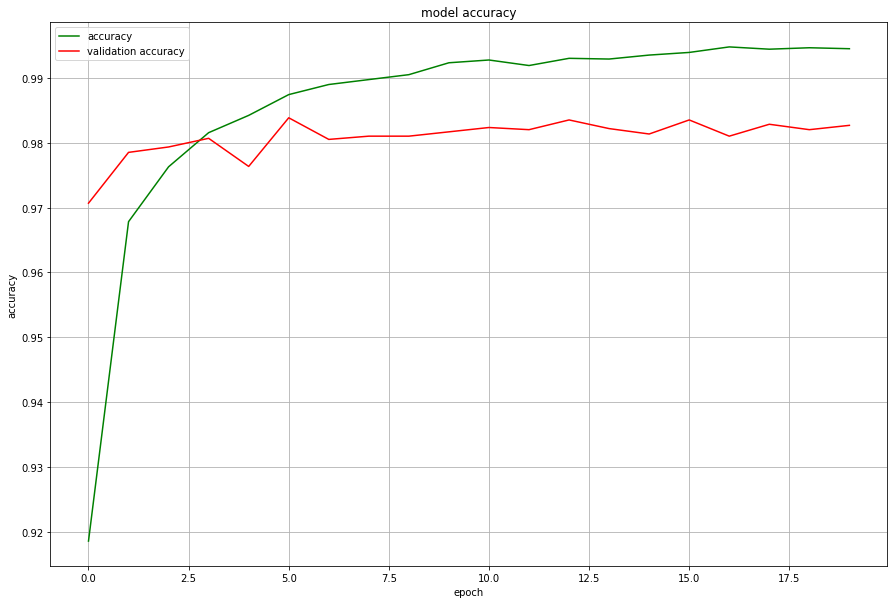

In [22]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['accuracy'], label="accuracy", color='green')
plt.plot(history.history['val_accuracy'], label="validation accuracy", color='red')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend()

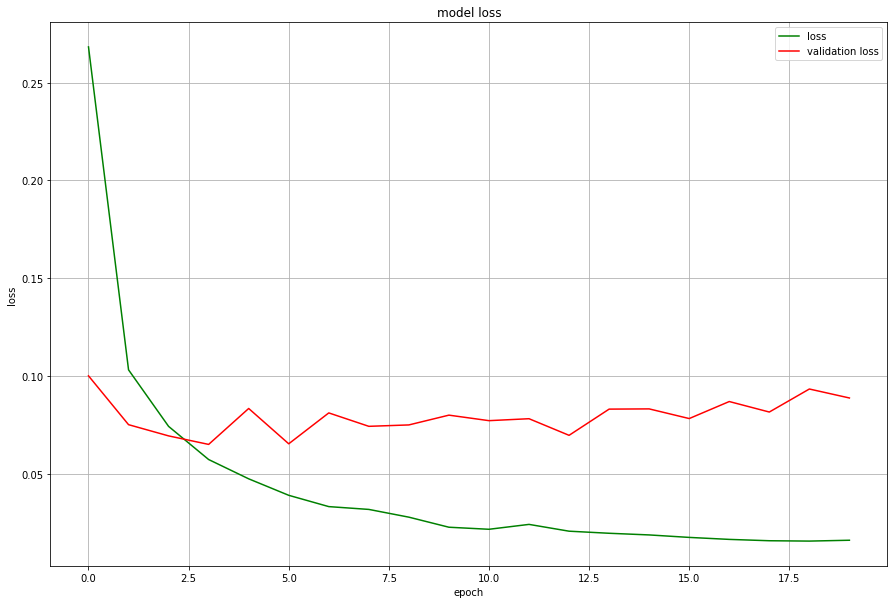

In [23]:
plt.figure(figsize=(15, 10))
plt.plot(history.history['loss'], label="loss", color='green')
plt.plot(history.history['val_loss'], label="validation loss", color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend()

In [24]:
loss, accuracy = model.evaluate(X_test, Y_test, verbose=2)

In [25]:
loss

0.07656290980688724

In [26]:
accuracy

0.9819999933242798

In [35]:
def draw(image, text):
    fig = plt.figure(figsize=(5, 5))

    ax = fig.add_subplot(111)
    ax.set_title('----')
    plt.imshow(image)
    ax.set_aspect('equal')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
    cax.get_xaxis().set_visible(False)
    cax.get_yaxis().set_visible(False)
    cax.set_frame_on(False)
    plt.suptitle(text)
    plt.title('')
    plt.show()

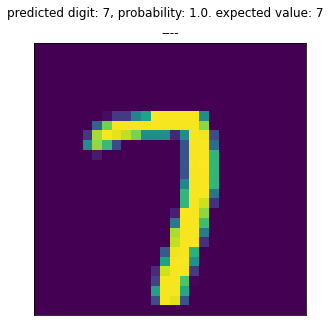

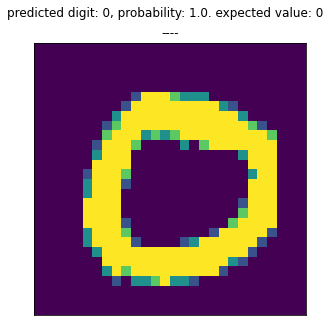

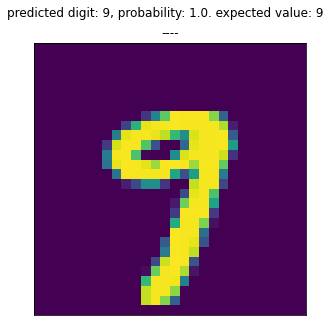

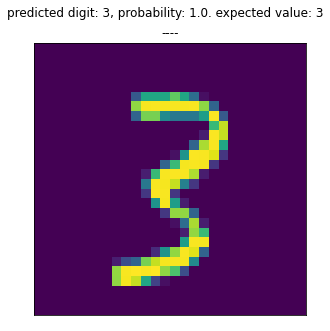

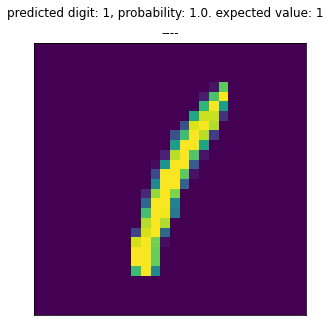

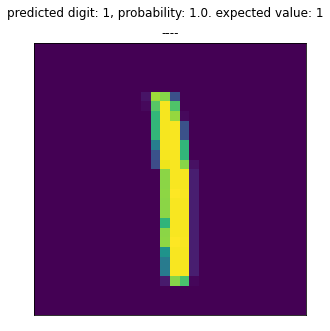

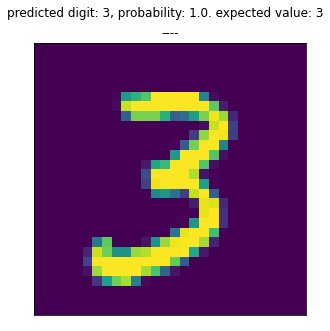

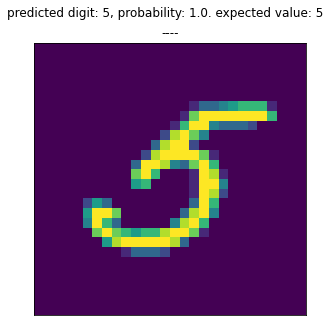

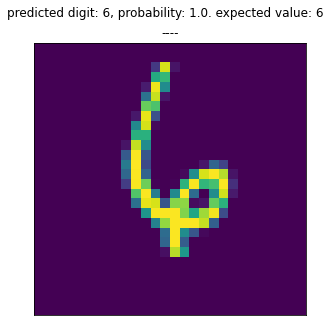

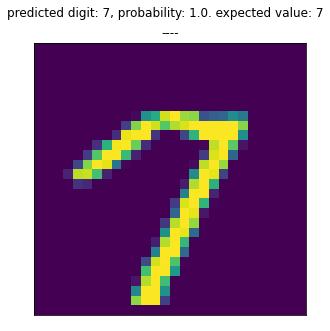

In [37]:
for _ in range(10):
    index = int(np.floor(np.random.uniform(0, len(X_test))))

    probabilities = model.predict(np.array([X_test[index]]))
    # print(probabilities)
    predicted_digit = np.where(probabilities > 0.5)[1][0]

    draw((X_test[index] * 255).reshape(28, 28), f'predicted digit: {predicted_digit}, probability: {probabilities[0][predicted_digit]:.3}. expected value: {np.where(Y_test[index] == 1)[0][0]}')